This is a part of my Ph.D research project

In [1]:
import os
os.getcwd()

'D:\\courses\\insight_data_science\\Insight_data_science'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
PET_AD = pd.read_csv('suvr.csv', na_values=['NA'], index_col=['subject'])
PET_AD.head(n=5)

,ID,CDR,PET_data,PET_tracer,PET_stat,gender,age,ctx-bankssts,ctx-caudalanteriorcingulate,ctx-caudalmiddlefrontal,...,ctx-temporalpole,ctx-transversetemporal,wm-cerebellum,ctx-cerebellum,thalamus,caudate,putamen,pallidum,hippocampus,amygdala
subject,,,,,,,,,,,,,,,,,,,,,
AD4,1,0.0,available,PiB,1.0,M,65,1.9865,1.9617,1.9050,...,1.4533,1.8135,1.5785,1.0,1.8507,1.6624,2.0614,1.9042,1.3035,1.3734
AD5,2,0.0,available,PiB,0.0,F,79,1.1835,1.0385,0.9577,...,1.0433,1.1013,1.7231,1.0,1.4238,0.9978,1.3678,1.7491,1.1173,1.2343
AD6,3,0.0,available,PiB,0.0,F,74,1.2877,1.1414,1.0726,...,1.1457,1.1616,1.7347,1.0,1.5018,1.1264,1.4313,1.7780,1.2927,1.2442
AD7,4,0.5,available,PiB,1.0,F,79,2.0076,1.8313,1.5333,...,1.2689,1.6716,1.6842,1.0,2.0354,1.8748,2.0818,1.9877,1.3401,1.3718
AD8,5,0.5,NaN,NaN,NaN,M,72,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
MRI_AD = pd.read_csv('R2s_mean.csv', na_values=['NA'], index_col=['subject'])
MRI_AD.head(n=5)

,ID,CDR,PET_data,PET_tracer,PET_stat,gender,age,ctx-bankssts,ctx-caudalanteriorcingulate,ctx-caudalmiddlefrontal,...,ctx-temporalpole,ctx-transversetemporal,wm-cerebellum,ctx-cerebellum,thalamus,caudate,putamen,pallidum,hippocampus,amygdala
subject,,,,,,,,,,,,,,,,,,,,,
AD4,1,0.0,available,PiB,1.0,M,65,19.802828,16.415900,18.534888,...,17.552404,17.519118,17.064649,17.511120,21.505069,24.580769,28.997537,36.388054,16.788996,17.833733
AD5,2,0.0,available,PiB,0.0,F,79,18.342368,15.692319,17.757124,...,14.242107,17.287985,14.265215,12.492735,20.649328,24.536857,30.475405,40.790454,19.010596,16.029070
AD6,3,0.0,available,PiB,0.0,F,74,17.329492,14.064403,15.648128,...,14.266886,15.729439,14.885239,15.472910,18.774864,18.914193,23.467916,33.918651,16.261647,16.271197
AD7,4,0.5,available,PiB,1.0,F,79,21.225398,17.714105,20.070420,...,13.871448,18.626051,19.667387,18.094276,24.486720,32.167129,41.509962,51.811002,19.895585,21.588230
AD8,5,0.5,NaN,NaN,NaN,M,72,18.630182,16.043634,16.417473,...,NaN,17.827887,16.381261,12.705403,21.814847,24.584332,35.125012,37.056673,15.026736,20.597741


Goal: Investigate the relationship between MRI and PET measurements in regions of interest (ROI)
1. Subset samples with available PET ROI data and with 'PiB' as the PET tracer
2. Correlate PET and MRI data across samples in each ROI

In [5]:
mask = (PET_AD['PET_data'].notnull()) & (PET_AD['PET_tracer'] == 'PiB')
MRI_data = MRI_AD.ix[mask, 'ctx-bankssts':'ctx-transversetemporal']
PET_data = PET_AD.ix[mask, 'ctx-bankssts':'ctx-transversetemporal']
PET_target = PET_AD.ix[mask, 'PET_stat']
print([MRI_data.shape, PET_data.shape]) 

[(20, 34), (20, 34)]


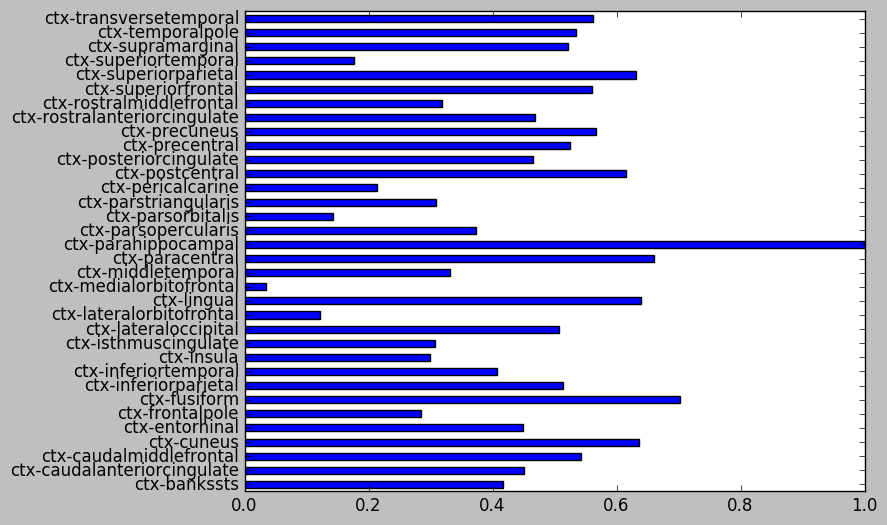

In [37]:
MRI_data.corrwith(MRI_data['ctx-parahippocampal']).plot.barh()

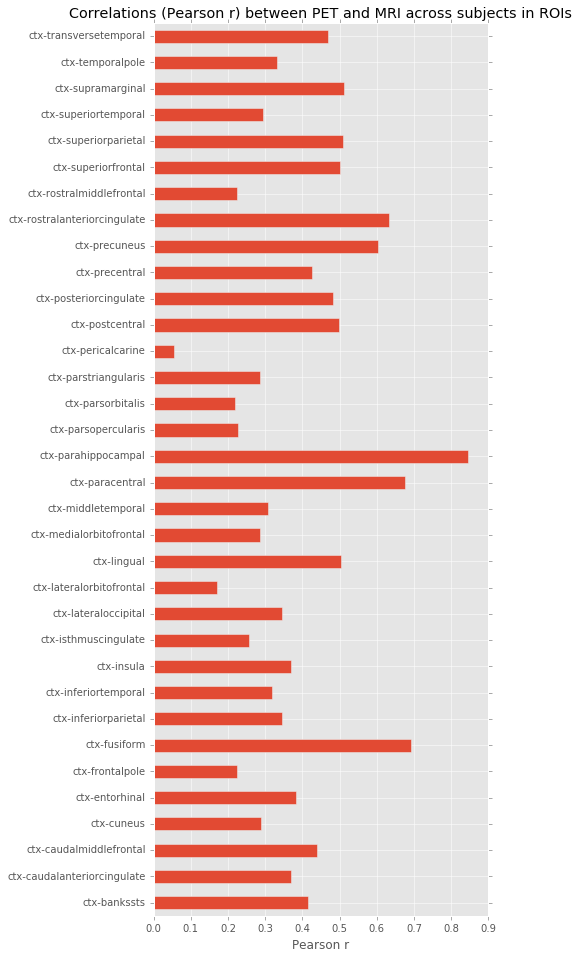

In [12]:
paircorr = MRI_data.corrwith(PET_data)
plt.figure(figsize=(6, 16))
ax_PET2MRI = paircorr.plot.barh()
plt.title('Correlations (Pearson r) between PET and MRI across subjects in ROIs')
ax_PET2MRI.set_xlabel('Pearson r')

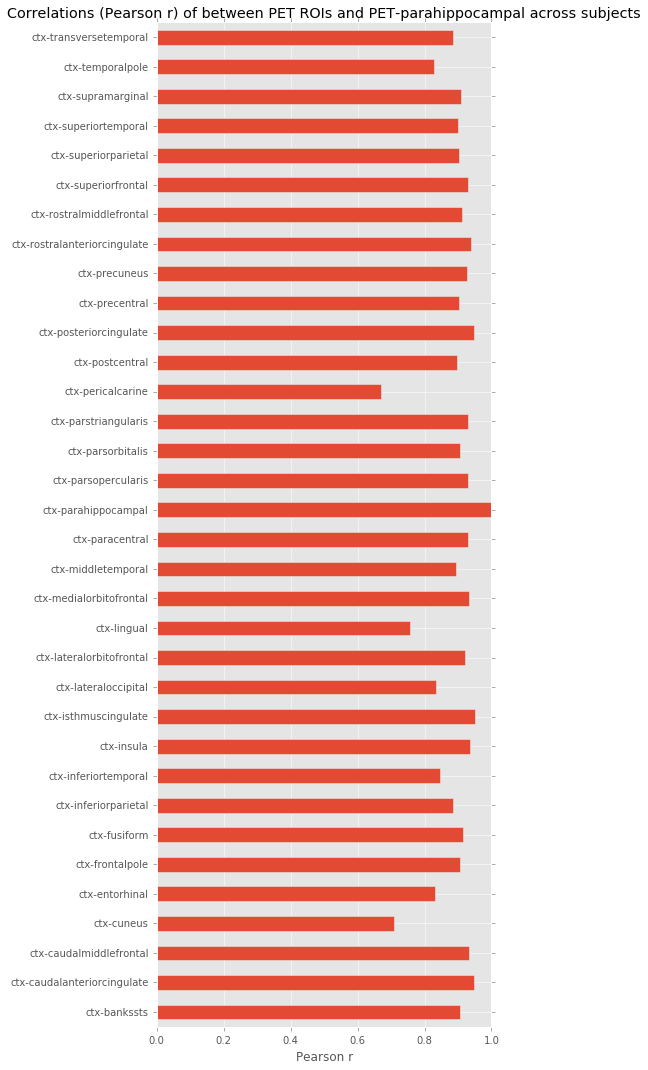

In [6]:
PET_corr = PET_data.corrwith(PET_data['ctx-parahippocampal'])
plt.figure(figsize=(6, 18))
ax_PET2PET = PET_corr.plot.barh()
plt.title('Correlations (Pearson r) of between PET ROIs and PET-parahippocampal across subjects')
ax_PET2PET.set_xlabel('Pearson r')

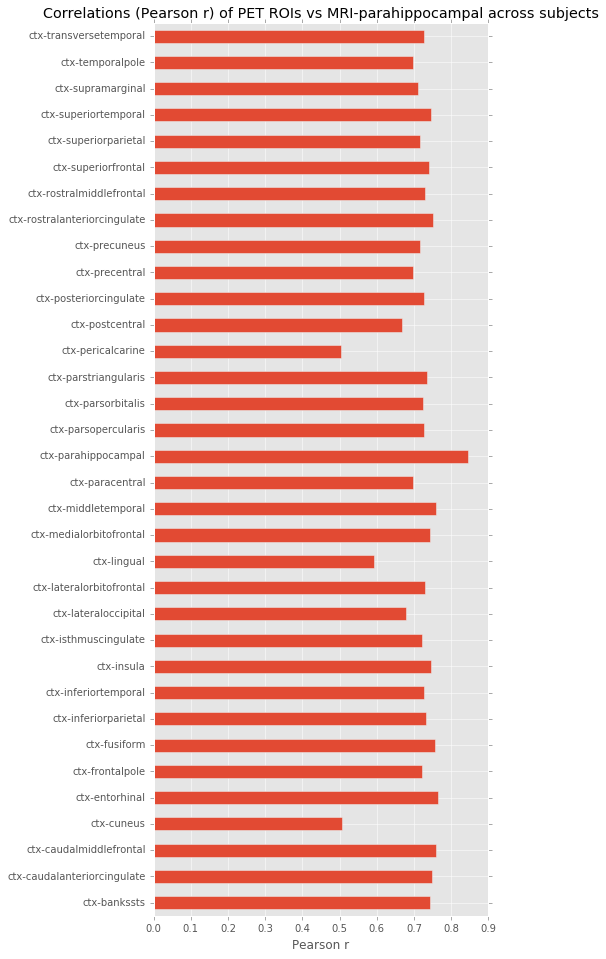

In [7]:
para_corr = PET_data.corrwith(MRI_data['ctx-parahippocampal'])
plt.figure(figsize=(6, 16))
ax_PET2MRI_para = para_corr.plot.barh()
plt.title('Correlations (Pearson r) of PET ROIs vs MRI-parahippocampal across subjects')
ax_PET2MRI_para.set_xlabel('Pearson r')

Look at the correlations between PET and MRI across samples in each ROI
Adjust p values due to multiple comparisons

In [8]:
import seaborn as sns
import scipy.stats
import statsmodels.sandbox.stats.multicomp

In [9]:
pearson = [scipy.stats.pearsonr(MRI_data[column], PET_data[column]) for column in MRI_data]
df_pearson = pd.DataFrame(pearson, columns=['r', 'p'], index=MRI_data.columns)
reject, pval_adjusted, alphaS, alphaB = statsmodels.sandbox.stats.multicomp.multipletests(df_pearson['p'], 
                                                                                          alpha=0.05, 
                                                                                          method='fdr_bh')
df_pearson['p_adjusted'] = pval_adjusted
df_pearson = df_pearson.T
df_pearson.head(n=3)

,ctx-bankssts,ctx-caudalanteriorcingulate,ctx-caudalmiddlefrontal,ctx-cuneus,ctx-entorhinal,ctx-frontalpole,ctx-fusiform,ctx-inferiorparietal,ctx-inferiortemporal,ctx-insula,...,ctx-precentral,ctx-precuneus,ctx-rostralanteriorcingulate,ctx-rostralmiddlefrontal,ctx-superiorfrontal,ctx-superiorparietal,ctx-superiortemporal,ctx-supramarginal,ctx-temporalpole,ctx-transversetemporal
r,0.415571,0.369183,0.440020,0.287981,0.382548,0.224815,0.691048,0.344806,0.318419,0.370333,...,0.424935,0.603297,0.633748,0.223796,0.501311,0.509658,0.295255,0.512450,0.332703,0.468090
p,0.068416,0.109174,0.052198,0.218228,0.095979,0.340620,0.000741,0.136532,0.171234,0.107990,...,0.061810,0.004861,0.002697,0.342870,0.024334,0.021704,0.206300,0.020876,0.151773,0.037394
p_adjusted,0.155076,0.206218,0.136518,0.280135,0.203956,0.374177,0.012233,0.232105,0.264634,0.206218,...,0.150111,0.033053,0.022925,0.374177,0.085353,0.085353,0.280135,0.085353,0.245727,0.105949


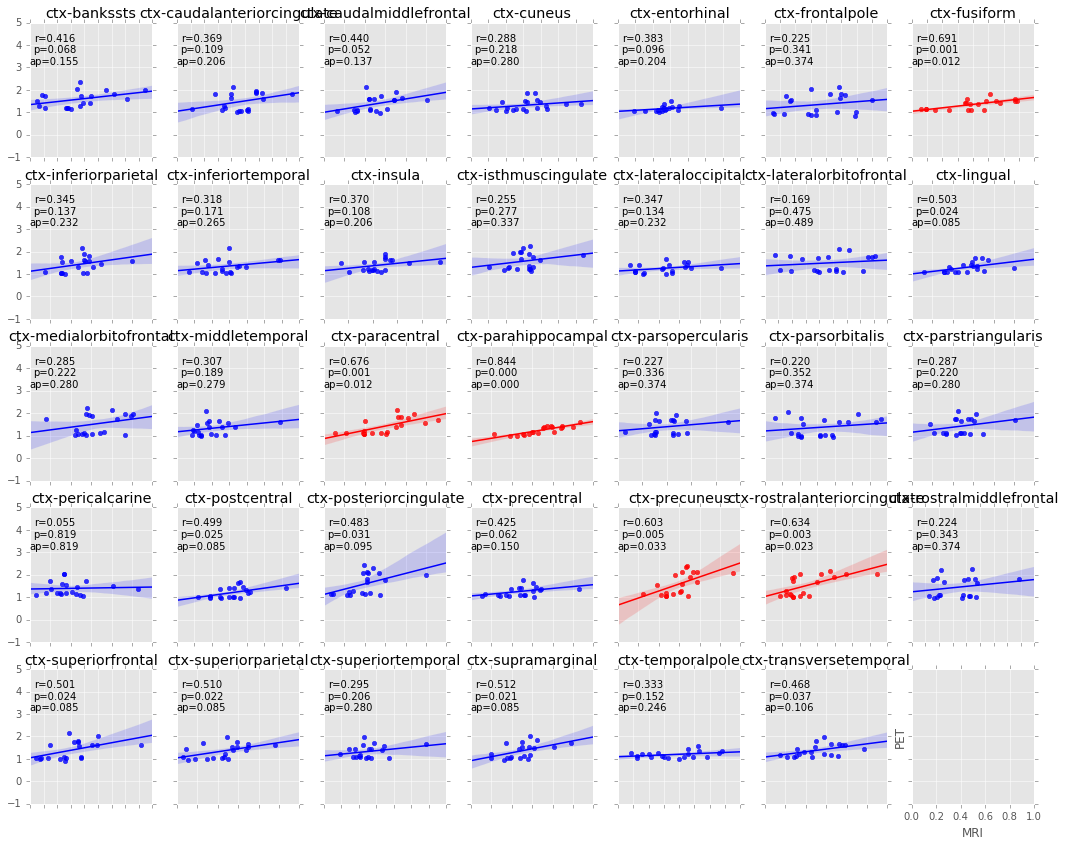

In [104]:
figs, axes = plt.subplots(5, 7, sharex=False, sharey=True)
figs.set_size_inches(18, 14)
counter = 0
for i in range(5):
    for j in range(7):
        #r, p = scipy.stats.pearsonr(R2s_data.iloc[:, counter], SUVR_data.iloc[:, counter])
        r, p, ap = df_pearson.iloc[:,counter]
        xdata, ydata = MRI_data.iloc[:, counter], PET_data.iloc[:, counter]
        if r > 0.6 and ap < 0.05:
            sns.regplot(xdata, ydata, color='r', ax=axes[i, j])
        else:
            sns.regplot(xdata, ydata, color='b', ax=axes[i, j])
        axes[i, j].set_xticklabels([''])
        axes[i, j].set_title(MRI_data.columns[counter])
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].text(0.2, 0.8, 'r=%.3f\np=%.3f\nap=%.3f' % (r, p, ap), 
                        horizontalalignment='center', 
                        verticalalignment='center',
                        transform=axes[i, j].transAxes)
        if counter < 33:
            counter += 1
        else:
            break
plt.xlabel('MRI')
plt.ylabel('PET')

Conclusion: 
1. In specific ROIs (parahippocampal cortex), MRI data highly and significantly correlate with PET data
2. MRI data has the potential to predict PET data for the whole brain

Goal: Investigate the "patterns" in MRI data and use MRI data to separate normal from preclinical 
1. Use all samples whether the PET_data is available or not but adjust ROIs
2. Separate training and testing sets
2. Apply PCA on training MRI data 
3. Reduce dimensionality and use the first a few components
4. Apply logistic regression and SVM to separate groups
5. Test the correctness with test sets

In [10]:
def region_correction(df):
    bad_regions = ['ctx-entorhinal','ctx-frontalpole','ctx-inferiortemporal','ctx-lateralorbitofrontal',
                   'ctx-medialorbitofrontal','ctx-pericalcarine','ctx-temporalpole','ctx-transversetemporal']
    return df.drop(bad_regions, axis=1)   

In [11]:
MRI_pca = MRI_AD.loc[:, 'ctx-bankssts':'ctx-transversetemporal']
MRI_pca['PET_stat'] = MRI_AD['PET_stat']
MRI_pca = region_correction(MRI_pca.dropna())
MRI_pca_data, MRI_pca_target = MRI_pca.loc[:, 'ctx-bankssts':'ctx-supramarginal'], MRI_pca['PET_stat']
print(MRI_pca_data.shape)

(35, 26)


In [32]:
def biplot(pca, x_trans, y, labels, x_axis, y_axis):
    #pca is returned from sklearn.decomposition.PCA()
    #x_trans = pca(x)
    #y is a Series of 
    first_comp, second_comp = x_trans[:, x_axis], x_trans[:, y_axis]
    first_rot, second_rot = pca.components_[x_axis, :], pca.components_[y_axis, :]
    plt.figure(figsize=(8, 8)) 
    plt.scatter(first_comp, second_comp, c=y, s=50)
    for region in range(len(first_rot)):
        plt.arrow(0, 0, first_rot[region]*max(first_comp)*1.2, 
                  second_rot[region]*max(second_comp)*1.2, color='b')
        plt.text(first_rot[region]*max(first_comp)*1.2*1.1, 
                 second_rot[region]*max(second_comp)*1.2*1.1,
                 labels[region], color='b', fontsize=7)    

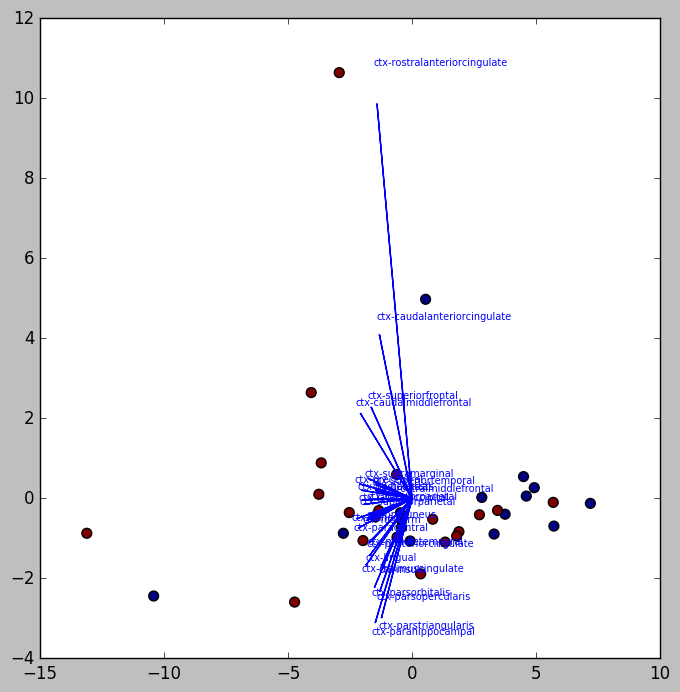

In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
matplotlib.style.use('classic')
pca_MRI_all = PCA(whiten=False)
pca_MRI_all.fit(MRI_pca_data)
MRI_all_tran = pca_MRI_all.transform(MRI_pca_data)
biplot(pca_MRI_all, MRI_all_tran, MRI_pca_target, MRI_pca_data.columns, 0, 1)

[(28, 26), (7L,)]


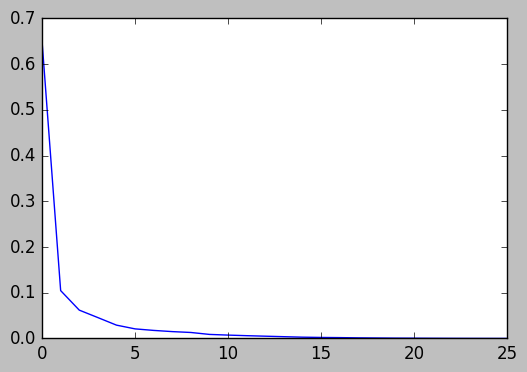

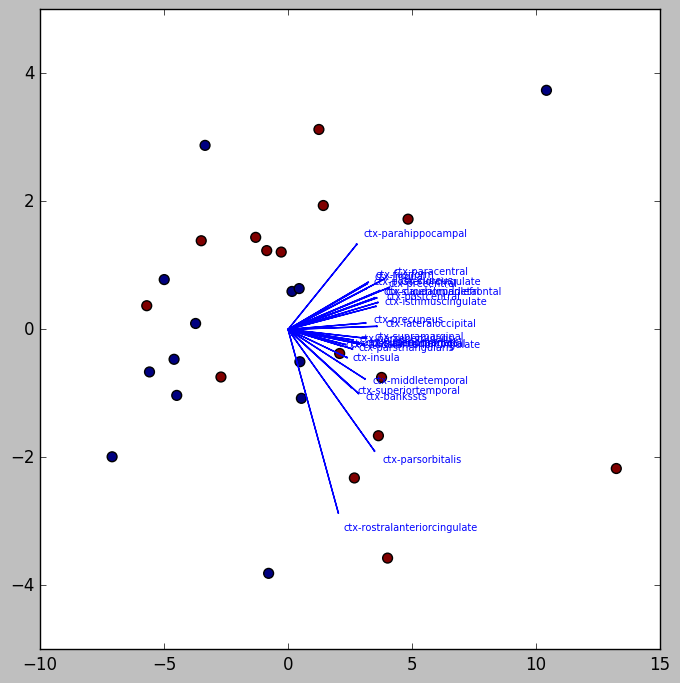

In [41]:
MRI_train_data, MRI_test_data, MRI_train_target, MRI_test_target = train_test_split(MRI_pca_data, MRI_pca_target,
                                                                                    random_state=3, test_size=0.2)
print([MRI_train_data.shape, MRI_test_target.shape])
pca_MRI = PCA(whiten=False)
pca_MRI.fit(MRI_train_data)
MRI_train_tran = pca_MRI.transform(MRI_train_data)
plt.figure(figsize=(6, 4))
plt.plot(pca_MRI.explained_variance_ratio_)
biplot(pca_MRI, MRI_train_tran, MRI_train_target, MRI_train_data.columns, 0, 1)

In [42]:
from sklearn import linear_model
MRI_train_comp = MRI_train_tran[:, 0:5]
logistic_comp = linear_model.LogisticRegression(penalty='l2')
logistic_comp.fit(MRI_train_comp, MRI_train_target)
print('logistic training score: %.3f' % logistic_comp.score(MRI_train_comp, MRI_train_target))
MRI_test_comp = pca_MRI.transform(MRI_test_data)[:, 0:5]
print('logistic testing score: %.3f' % logistic_comp.score(MRI_test_comp, MRI_test_target))

logistic training score: 0.857
logistic testing score: 0.714


In [ ]:
#Visualize logistic regression data

In [116]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
C_range = np.logspace(-4, 5, 10)
param_grid = dict(C=C_range)
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid)
grid.fit(MRI_train_comp, MRI_train_target)
print([grid.best_params_, grid.best_score_])

[{'C': 0.10000000000000001}, 0.75]


In [117]:
svm_linear = svm.SVC(C=0.1, kernel='linear')
svm_linear.fit(MRI_train_comp, MRI_train_target)
print(svm_linear.score(MRI_train_comp, MRI_train_target))
MRI_test_comp = pca_MRI.transform(MRI_test_data)[:, 0:5]
print(svm_linear.score(MRI_test_comp, MRI_test_target))

0.857142857143
0.571428571429


In [118]:
C_range = np.logspace(-4, 5, 10)
gamma_range = np.logspace(-5, 4, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid)
grid.fit(MRI_train_comp, MRI_train_target)
print([grid.best_params_, grid.best_score_])

[{'C': 1.0, 'gamma': 0.01}, 0.6785714285714286]


In [119]:
svm_rbf = svm.SVC(C=1.0, gamma=0.01, kernel='rbf')
svm_rbf.fit(MRI_train_comp, MRI_train_target)
print(svm_rbf.score(MRI_train_comp, MRI_train_target))
MRI_test_comp = pca_MRI.transform(MRI_test_data)[:, 0:5]
svm_rbf.score(MRI_test_comp, MRI_test_target)

0.785714285714


0.7142857142857143

In [120]:
def svm_plot(svm_model, X, y, step):
    x1, x2 = X[:, 0], X[:, 1]
    xx1, xx2 = np.meshgrid(np.arange(x1.min() - 1, x1.max() + 1, step),
                           np.arange(x2.min() - 1, x2.max() + 1, step))
    zz = svm_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    zz = zz.reshape(xx1.shape)
    plt.contourf(xx1, xx2, zz, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(x1, x2, c=y, cmap=plt.cm.Paired)

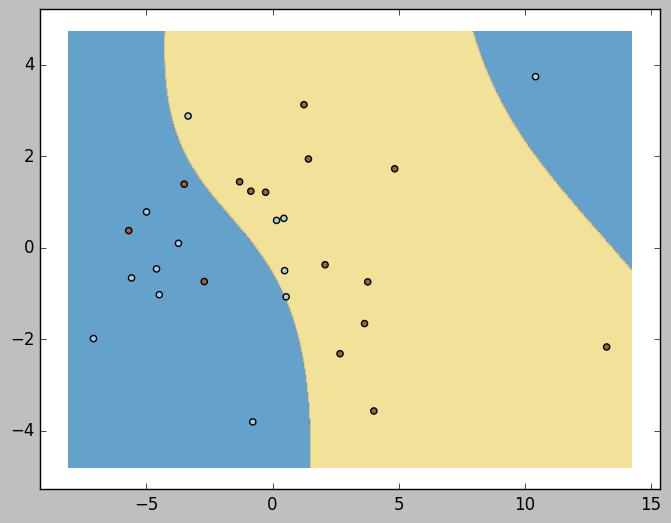

In [121]:
svm_2d = svm.SVC(C=100.0, gamma=0.01, kernel='rbf')
svm_2d.fit(MRI_train_comp[:,0:2], MRI_train_target)
svm_plot(svm_2d, MRI_train_comp[:,0:2], MRI_train_target, 0.01)

Goal: Use advanced MRI data in hippocampus to separate Mild AD and non-AD

In [54]:
MRI_adv_AD = pd.read_csv('R2_mean.csv', na_values=['NA'], index_col=['subject'], skiprows=[4, 5])
MRI_adv_hippo = MRI_adv_AD.loc[:, ['CDR', 'PET_stat', 'hippocampus']]
MRI_adv_hippo.head()

,CDR,PET_stat,hippocampus
subject,,,
AD4,0.0,1,13.500613
AD5,0.0,0,13.235511
AD6,0.0,0,12.893496
AD9,0.5,1,10.858942
AD10,0.5,1,12.623293


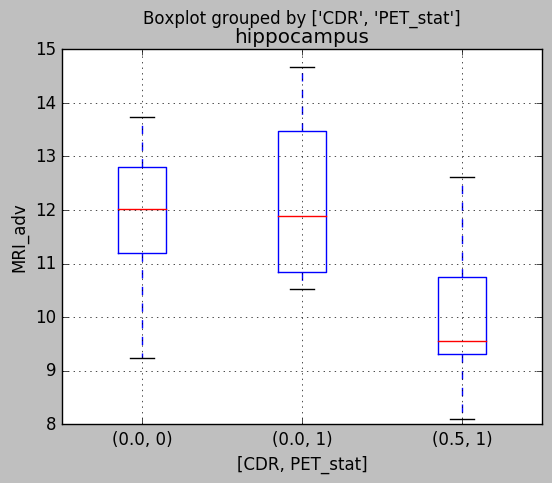

In [61]:
ax = MRI_adv_hippo.boxplot('hippocampus', by=['CDR', 'PET_stat'], figsize=(6, 5))
#ax.set_xticklabels(['Normal', 'Preclinical', 'Mild AD'])
ax.set_ylabel('MRI_adv')

In [57]:
MRI_adv_grp = MRI_adv_hippo.groupby(['CDR', 'PET_stat'])
MRI_adv_grp.size()

CDR  PET_stat
0.0  0           13
     1           10
0.5  1           11
dtype: int64